In [26]:
import numpy as np
import cv2
import copy
import math
import matplotlib.pyplot as plt

In [27]:
def remove_padding(image,size):
    len1=len(image)
    len2=len(image[0])
    size=int(size/2)
    for i in range(size):
        del image[0]
        
    for i in range(size):
        del image[len1-2*size]

    for i in range(len(image)):
        for j in range(size):
            del image[i][0]
        
        for j in range(size):
            del image[i][len2-2*size]
    return image
    


In [28]:
def gaussian_func(x,y,std):
    value=(-1)*(x**2+y**2)/float(2*(std**2))
    return math.exp(value)/float((2*math.pi*(std**2)))


In [29]:
def padding(image,size):
    size=int(size/2)
    len1,len2=image.shape
    pad=[]
    for i in range(0,(len1+2*size)):
        temp=[]
        for j in range(0,(len2+2*size)):
            if i<size or j<size  or j>=(len2+size) or i>=(len1+size):
                temp.append(0)
            else:
                temp.append(image[i-size][j-size])
        pad.append(temp)
    return pad


In [30]:
def summing(image):
    length1=len(image)
    length2=len(image[0])
    counter=0
    for i in range(length1):
        for j in range(length2):
            counter=counter+image[i][j]
    return counter
    

In [31]:
def gaussian_filter(image,kernel_func,i,j):
    len1=len(kernel_func)
    len2=len1
    len1=int(len1/2)
    filter_space=[]
    for k in range((i-len1),(i+len1+1)):
        temp=[]
        for l in range((j-len1),(j+len1+1)):
            temp.append(image[k][l])
        filter_space.append(temp)
    
    final_array=(np.array(filter_space).reshape(len2,len2))*(np.array(kernel_func).reshape(len2,len2))
    return summing(final_array)

In [60]:
def check_corner(a,b,c):
    det=a*b-c*c
    second=0.04*((a+b)**2)
    #Threshold is taken here 
    if (det-second)>0.005:
        return 1
    return 0

In [33]:
# Load an color image 
img = cv2.imread('yosemite1.jpg',0)
cv2.imshow('Main Image ',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
size_local=255

In [35]:
#After edge detection by using sobel operator
Ix=cv2.Sobel(img, cv2.CV_32F, 1,0)
Iy=cv2.Sobel(img, cv2.CV_32F, 0,1)
cv2.imwrite('Image_X.png',(Ix/np.max(Ix)*size_local))
cv2.imshow('After derivative of X  ',Ix/np.max(Ix))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('Image_Y.png',(Iy/np.max(Iy)*size_local))
cv2.imshow('After derivative of X  ',Iy/np.max(Iy))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
#Compute all images derivatives as Ixy, Ix2 and Iy2
#Normalise the images
Ix=Ix/np.max(Ix)
Iy=Iy/np.max(Iy)
Ixy=Ix*Iy
Ixy=Ixy
Ix2=Ix*Ix
Ix2=Ix2
Iy2=Iy*Iy
Iy2=Iy2
cv2.imwrite('Image_XY.png',(Ixy/np.max(Ixy)*size_local))
cv2.imshow('XY image  ',Ixy/np.max(Ixy))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('Image_Y2.png',(Iy2/np.max(Iy2)*size_local))
cv2.imshow('Y*Y ',Iy2/np.max(Iy2))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('Image_X2.png',(Ix2/np.max(Ix2)*size_local))
cv2.imshow('X*X  ',Ix2/np.max(Ix2))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [61]:
#Compute the kernel of 7*7 for gaussian filter 
kernel=7
kernel_space=[]
for i in range(kernel):
    temp=[]
    for j in range(kernel):
        temp.append(gaussian_func((i-3),(j-3),1.5))
    kernel_space.append(temp)
kernel_space/=np.sum(kernel_space)

#Padding for all the images

#For Ix2
Ix21=[]
Ix21=padding(Ix2,7)
Ix22=copy.deepcopy(Ix21)
#For Iy2
Iy21=[]
Iy21=padding(Iy2,7)
Iy22=copy.deepcopy(Iy21)
#For Ixy
Ixy1=[]
Ixy1=padding(Ixy,7)
Ixy2=copy.deepcopy(Ixy1)
store=[]
for i in range(3,(len(Ix21)-3)):
    for j in range(3,(len(Ix21[i])-3)):
        a=gaussian_filter(Ix22,list(kernel_space),i,j)
        b=gaussian_filter(Iy22,list(kernel_space),i,j)
        c=gaussian_filter(Ixy2,list(kernel_space),i,j)
        flag=check_corner(a,b,c)
        if flag==1:
            temp=[]
            temp.append(i-3)
            temp.append(j-3)
            store.append(temp)
        
        

In [62]:
I = np.dstack([img, img, img])
len(store)

2513

In [63]:
for i in range(len(store)):
    I[store[i][0],store[i][1], :]=[0,0,255]

In [64]:
cv2.imwrite('Image_after_detection0.005.png',(I/np.max(I)*size_local))
cv2.imshow('Main Image after corner detection  ',I/np.max(I))
cv2.waitKey(0)
cv2.destroyAllWindows()

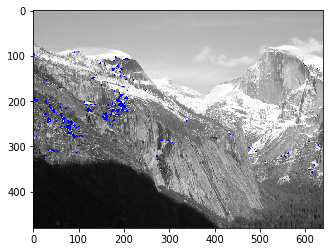

In [65]:
plt.imshow(I, interpolation='nearest')